In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
products =  pd.read_csv('archive/olist_products_dataset.csv', usecols=['product_id','product_category_name'])

orders = pd.read_csv('archive/olist_orders_dataset.csv',usecols = ['order_id','customer_id'])

prod = pd.read_csv('archive/olist_order_items_dataset.csv',usecols = ['product_id','order_id'])

customers = pd.read_csv('archive/olist_customers_dataset.csv',usecols = ['customer_id','customer_zip_code_prefix','customer_city'])

reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv',usecols = ['order_id','review_score','review_comment_message'])
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null values")
    print(df.isnull().sum())
describe_data(products)

Data Types:
product_id               object
product_category_name    object
dtype: object
Rows and Columns:
(32951, 2)
Column Names:
Index(['product_id', 'product_category_name'], dtype='object')
Null values
product_id                 0
product_category_name    610
dtype: int64


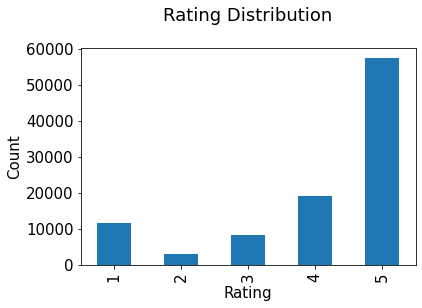

In [3]:
plt.rc("font", size=15)
reviews.review_score.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [4]:
comb_product = pd.merge(products, prod, on ='product_id')
comb_product.head(5)

,product_id,product_category_name,order_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb


In [5]:
comb_product_review = pd.merge(comb_product,reviews, on = 'order_id')
comb_product_review = pd.merge(comb_product_review,orders, on = 'order_id')
comb_product_review.head(5)

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,5,Excelente apontador! Em 3 segundos uma ponta p...,03fc97548af8f58fefc768d12b546c9c
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22


In [6]:
comb_product_review=comb_product_review.dropna(subset = ['product_category_name', 'review_score'])
comb_product_review.head(5)

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,5,Excelente apontador! Em 3 segundos uma ponta p...,03fc97548af8f58fefc768d12b546c9c
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22


In [7]:
review_count = pd.DataFrame(comb_product_review.groupby('product_category_name')['review_score'].count())
review_count.sort_values('review_score', ascending=False).head()

,review_score
product_category_name,
cama_mesa_banho,11272
beleza_saude,9728
esporte_lazer,8701
moveis_decoracao,8416
informatica_acessorios,7895


In [8]:
high_review_score = comb_product_review.product_category_name[comb_product_review.review_score == 5]
high_review_score

0                     perfumaria
1                          artes
2                  esporte_lazer
4          utilidades_domesticas
5          instrumentos_musicais
                   ...          
113315    informatica_acessorios
113318    informatica_acessorios
113319    informatica_acessorios
113320    informatica_acessorios
113321           cama_mesa_banho
Name: product_category_name, Length: 62782, dtype: object

In [9]:
print(len(high_review_score.unique()))

72


In [10]:
print((high_review_score.unique()))

['perfumaria' 'artes' 'esporte_lazer' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'cama_mesa_banho' 'bebes'
 'informatica_acessorios' 'moveis_decoracao' 'eletronicos' 'brinquedos'
 'beleza_saude' 'automotivo' 'fashion_calcados' 'papelaria'
 'ferramentas_jardim' 'pcs' 'casa_construcao' 'relogios_presentes'
 'eletroportateis' 'agro_industria_e_comercio' 'telefonia' 'moveis_sala'
 'pet_shop' 'climatizacao' 'fashion_bolsas_e_acessorios' 'consoles_games'
 'malas_acessorios' 'eletrodomesticos' 'moveis_escritorio'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'construcao_ferramentas_construcao'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'construcao_ferramentas_iluminacao'
 'construcao_ferramentas_seguranca' 'fashion_roupa_masculina'
 'livros_tecnicos' 'eletrodomesticos_2' 'livros_interesse_geral' 'bebidas'
 'market_place' 'la_cuisine' 'construcao_ferramentas_jardim'
 'casa_conforto' 'audio' 'alimentos_bebidas'

<AxesSubplot:xlabel='product_category_name'>

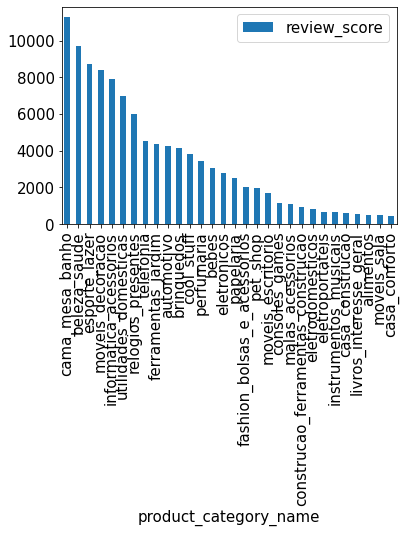

In [11]:
popular_products = pd.DataFrame(comb_product_review.groupby('product_category_name')['review_score'].count())
most_sold = popular_products.sort_values('review_score', ascending=False)
most_sold.head(30).plot(kind = "bar")

In [12]:
highestRated = pd.DataFrame(comb_product_review.groupby('product_id').agg(
    review_score_Avg = ('review_score', 'mean'),
    review_score_Count = ('review_score', 'count')
    ))

highestRated.sort_values(['review_score_Avg','review_score_Count'],ascending=False,inplace=True)           
highestRated.head(30)

,review_score_Avg,review_score_Count
product_id,,
37eb69aca8718e843d897aa7b82f462d,5.0,15
03e1c946c0ddfc58724ff262aef08dff,5.0,14
8173ca41cdb176462f9ae79821a48404,5.0,14
870bcc6c58e03ca658cfdd13db4bbe28,5.0,14
8b6ed41158b194711f83b8da92757544,5.0,14
2722b7e5f68e776d18fe901638034e54,5.0,13
143c616ec3fe0cb065c3805cf9bd812e,5.0,12
16ce899c7af0c99f46948734a0d00f0f,5.0,12
2ced45a3059cbb128a8b8b6508809746,5.0,11
